##Grupo:
###Alex Barbosa Felix da Silva
###Alexandre Alves Andrade

#Trabalho 02 Unidade 01

##Configurações Iniciais

Download das bases de dados
https://github.com/alvarofpp/dataset-flights-brazil

Antes de qualquer coisa, será necessário importar os arquivos **air_traffic. graphml** e **airports.csv**, e executar os seguintes códigos.[texto do link](https://)

In [ ]:
!pip install nxviz=='0.6.3'

In [ ]:
#Para plotar os gráficos, foi necessário essa versão do matplotlib
!pip install matplotlib==3.1.3

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import nxviz as nv
import csv
import seaborn as sns
import pandas as pd

In [4]:
DS_air_traffic = nx.read_graphml('air_traffic.graphml')

In [5]:
DS_airports = pd.read_csv("airports.csv", index_col="code")

Verificando os datasets

In [6]:
DS_air_traffic.nodes()

NodeView(('KDFW', 'KJFK', 'KMIA', 'SBCF', 'SBGL', 'SBGR', 'SGAS', 'SSUM', 'SUMU', 'nan', 'SNBG', 'KMCO', 'SSBG', 'SBCV', 'SBLP', 'SBSV', 'SNGI', 'SNTF', 'SBAR', 'SBMO', 'SBPL', 'SNBR', 'SNVR', 'CYYZ', 'DTTA', 'UUEE', 'GOOY', 'LFPG', 'SBKP', 'SOCA', 'SCEL', 'SBBV', 'SVPR', 'MMMX', 'MMUN', 'SPIM', 'SAEZ', 'SBFL', 'LEMD', 'SABE', 'SACO', 'SBPA', 'SAAR', 'SKBO', 'LIMC', 'LIRF', 'EGKK', '1AON', 'SBAA', 'SBAS', 'SBAU', 'SBBE', 'SBBH', 'SBBR', 'SBCG', 'SBCH', 'SBCJ', 'SBCT', 'SBCY', 'SBDN', 'SBEG', 'SBFC', 'SBFZ', 'SBGO', 'SBIL', 'SBIZ', 'SBJP', 'SBJV', 'SBLO', 'SBMA', 'SBMC', 'SBMQ', 'SBNF', 'SBNT', 'SBPJ', 'SBPN', 'SBPS', 'SBPV', 'SBRF', 'SBRJ', 'SBRP', 'SBSJ', 'SBSL', 'SBSM', 'SBSP', 'SBSR', 'SBTC', 'SBTE', 'SBTU', 'SBUG', 'SBUL', 'SBUR', 'SBVG', 'SBVH', 'SBVT', 'SDAG', 'SNDC', 'SNDM', 'SNTO', 'SSCK', 'SSEP', 'SSER', 'SSHZ', 'SSLT', 'SSPB', 'SSUW', 'SSZR', 'SWFX', 'SWGI', 'SWJI', 'SWKK', 'SWKN', 'SWNQ', 'SWPQ', 'SBBI', 'SBCX', 'SBFI', 'SBSN', 'SDAN', 'SDCO', 'SDUB', 'SNFE', 'SWGN', 'LFBO',

In [7]:
print("The network has {} nodes and {} edges".format(DS_air_traffic.number_of_nodes(),
                                                     DS_air_traffic.number_of_edges()))

The network has 1083 nodes and 9613 edges


In [16]:
print(DS_airports.head())

                            name state  ...       lat_geo_point       lon_geo_point
code                                    ...                                        
KDFW  DALLAS & FORT WORTH, TEXAS   NaN  ...           32.896801          -97.038002
KJFK          NEW YORK, NEW YORK   NaN  ...           40.639801            -73.7789
KMIA              MIAMI, FLORIDA   NaN  ...   25.79319953918457  -80.29060363769531
SBCF                     CONFINS    MG  ...  -19.62444305419922  -43.97194290161133
SBGL              RIO DE JANEIRO    RJ  ...      -22.8099994659      -43.2505569458

[5 rows x 8 columns]


In [17]:
DS_air_traffic.nodes(data=True)

NodeDataView({'KDFW': {'name': 'DALLAS & FORT WORTH, TEXAS', 'country': 'ESTADOS UNIDOS DA AMÉRICA', 'latitude': '32.896801', 'longitude': '-97.038002'}, 'KJFK': {'name': 'NEW YORK, NEW YORK', 'country': 'ESTADOS UNIDOS DA AMÉRICA', 'latitude': '40.639801', 'longitude': '-73.7789'}, 'KMIA': {'name': 'MIAMI, FLORIDA', 'country': 'ESTADOS UNIDOS DA AMÉRICA', 'latitude': '25.79319953918457', 'longitude': '-80.29060363769531'}, 'SBCF': {'name': 'CONFINS', 'country': 'BRASIL', 'latitude': '-19.62444305419922', 'longitude': '-43.97194290161133'}, 'SBGL': {'name': 'RIO DE JANEIRO', 'country': 'BRASIL', 'latitude': '-22.8099994659', 'longitude': '-43.2505569458'}, 'SBGR': {'name': 'GUARULHOS', 'country': 'BRASIL', 'latitude': '-23.435556411743164', 'longitude': '-46.47305679321289'}, 'SGAS': {'name': 'ASUNCIÓN', 'country': 'PARAGUAI', 'latitude': '-25.239999771118164', 'longitude': '-57.52000045776367'}, 'SSUM': {'name': 'UMUARAMA', 'country': 'BRASIL', 'latitude': '-23.7987003326416', 'longit

Para ter uma melhor análise dos dados apenas do Brasil, é necessário retirar dados de outros países, isso será feito logo em seguida.

In [18]:
#Filtrar para apenas voos dentro do brasil
air_traffic_br = []
for node in DS_air_traffic.nodes(data=True):
  if node[1]["country"] == "BRASIL":
    air_traffic_br.append(node[0])

#print(air_traffic_br)

DS_air_traffic_br = nx.subgraph(DS_air_traffic, air_traffic_br)

DS_air_traffic_br.nodes(data=True)

NodeDataView({'SSFB': {'name': 'FRANCISCO BELTRÃO', 'country': 'BRASIL', 'latitude': '-26.059200286865234', 'longitude': '-53.063499450683594'}, 'SBBR': {'name': 'BRASÍLIA', 'country': 'BRASIL', 'latitude': '-15.869167', 'longitude': '-47.920834'}, 'SSTE': {'name': 'TORRES', 'country': 'BRASIL', 'latitude': '-29.23417999999998', 'longitude': '-51.32977999999997'}, 'SSZR': {'name': 'SANTA ROSA', 'country': 'BRASIL', 'latitude': '-27.9067', 'longitude': '-54.520401'}, 'SWBI': {'name': 'BARREIRINHA', 'country': 'BRASIL', 'latitude': '-2.79241991043', 'longitude': '-57.0578994751'}, 'SBGS': {'name': 'PONTA GROSSA', 'country': 'BRASIL', 'latitude': '-25.085599999999943', 'longitude': '-50.178699999999935'}, 'SNAH': {'name': 'ADUSTINA', 'country': 'BRASIL', 'latitude': '-10.5809', 'longitude': '-38.088799'}, 'SDBB': {'name': 'BEBEDOURO', 'country': 'BRASIL', 'latitude': '-20.900400161743164', 'longitude': '-48.47330093383789'}, 'SIXE': {'name': 'ELDORADO DO SUL', 'country': 'BRASIL', 'latitu

In [11]:
print("The network has {} nodes and {} edges".format(DS_air_traffic_br.number_of_nodes(),
                                                     DS_air_traffic_br.number_of_edges()))

The network has 495 nodes and 4402 edges


## Realizar um estudo sobre a assortatividade da rede considerando como atributo a REGIÃO onde está localizado o aeroporto.


Primeiramente, será necessário adicionar um novo atributo, chamado *region*, no **DS_air_traffic** com a coluna contida no dataset **DS_airports**

In [19]:
for n in DS_air_traffic_br.nodes(data=True):
  n[1]["region"] = DS_airports.loc[n[0],"region"]

Para obter a assortatividade de um agrupamento do grafo como um todo, basta rodar a seguinte linha código.

In [20]:
nx.attribute_assortativity_coefficient(DS_air_traffic_br, "region")

0.36728130173582757

Com esse resultado não obtemos tantas informções sobre o conjunto de dados, dessa forma, devemos mapear os grupos presentes no atributo *region* e mostrar uma matriz mais detalhada do relacionamento entre tais grupos.

In [36]:
#Um dicionário para mapear as regiões existentes no grafo
mapeando = {
    "CENTRO-OESTE": 0,
    "NORDESTE": 1, 
    "NORTE": 2,
    "SUL": 3,
    "SUDESTE": 4
}
matriz = nx.attribute_mixing_matrix(DS_air_traffic_br, "region", mapping=mapeando)
print(matriz)

[[0.05224898 0.01067697 0.02226261 0.01226715 0.03441617]
 [0.01067697 0.07882781 0.02078601 0.01317583 0.05599727]
 [0.02226261 0.02078601 0.13584734 0.00726942 0.02782826]
 [0.01226715 0.01317583 0.00726942 0.06905952 0.04009541]
 [0.03441617 0.05599727 0.02782826 0.04009541 0.17446615]]


Nota-se sem muita dificuldade que as regiões se conectão mais com si mesma do que com qualquer outra região, isso visto na diagonal da matriz, por ter um valor mais próximo de 1, comparado com os número da mesma coluna e linha.

##Gerar um gráfico similar considerando como grupo a REGIÃO do aeroporto.

In [35]:
DS_air_traffic_br.nodes(data=True)

NodeDataView({'SSFB': {'name': 'FRANCISCO BELTRÃO', 'country': 'BRASIL', 'latitude': '-26.059200286865234', 'longitude': '-53.063499450683594', 'region': 'SUL'}, 'SBBR': {'name': 'BRASÍLIA', 'country': 'BRASIL', 'latitude': '-15.869167', 'longitude': '-47.920834', 'region': 'CENTRO-OESTE'}, 'SSTE': {'name': 'TORRES', 'country': 'BRASIL', 'latitude': '-29.23417999999998', 'longitude': '-51.32977999999997', 'region': 'SUL'}, 'SSZR': {'name': 'SANTA ROSA', 'country': 'BRASIL', 'latitude': '-27.9067', 'longitude': '-54.520401', 'region': 'SUL'}, 'SWBI': {'name': 'BARREIRINHA', 'country': 'BRASIL', 'latitude': '-2.79241991043', 'longitude': '-57.0578994751', 'region': 'NORTE'}, 'SBGS': {'name': 'PONTA GROSSA', 'country': 'BRASIL', 'latitude': '-25.085599999999943', 'longitude': '-50.178699999999935', 'region': 'SUL'}, 'SNAH': {'name': 'ADUSTINA', 'country': 'BRASIL', 'latitude': '-10.5809', 'longitude': '-38.088799', 'region': 'NORDESTE'}, 'SDBB': {'name': 'BEBEDOURO', 'country': 'BRASIL', 

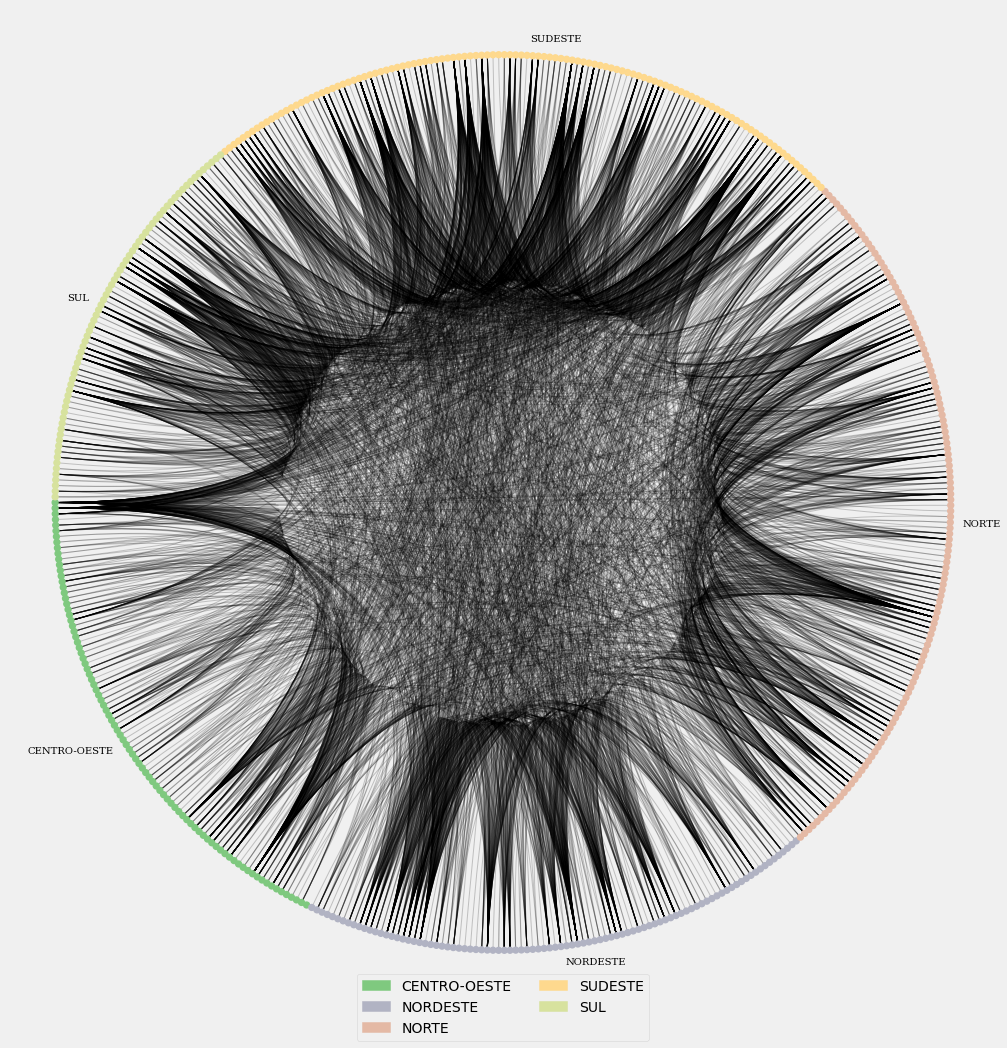

In [38]:
c = nv.CircosPlot(DS_air_traffic_br, node_color='region', node_grouping="region", node_order="region", group_label_position="middle", group_legend=True, figsize=(22,17))
c.draw()
plt.show()

É perceptível que a densidade do gráfico dificulta a análise aprofundada sobre os voos, mas é possível observar a densidade de voos entre aeroportos do presente no sudeste.

##Realizar uma análise bivariada entre o grau do vértice e o número médio de vizinhos.

Gerar um gráfico similar
considerando a rede do
Brasil e de todas as
Regiões (Norte, Nordeste,
Sul, Sudeste e
Centro-Oeste).


In [24]:
# Média do número de vizinhos
degree, avg_neigh_degree = zip(*nx.average_degree_connectivity(DS_air_traffic_br).items())

# convertando para lista
degree = list(degree)
avg_neigh_degree = list(avg_neigh_degree)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


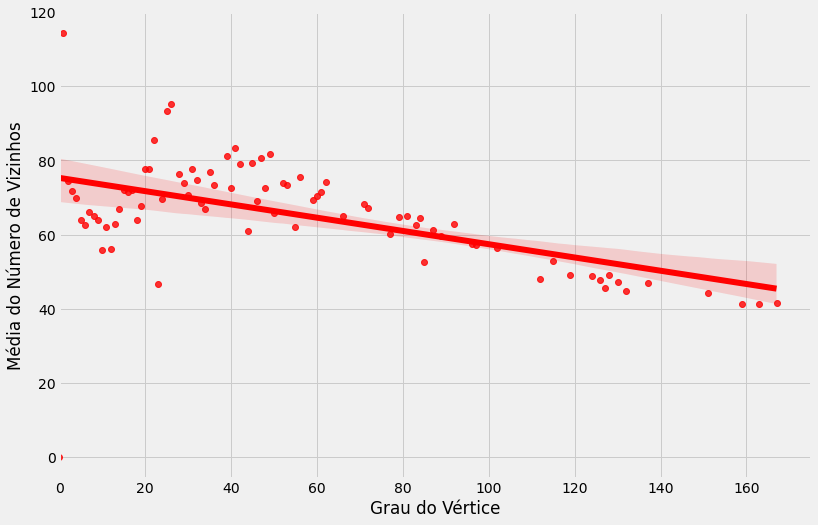

In [25]:
plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(1,1,figsize=(12,8))

sns.regplot(degree,avg_neigh_degree,ax=ax,color="red")

ax.set_xlabel("Grau do Vértice")
ax.set_ylabel("Média do Número de Vizinhos")
ax.set_xlim(0,175)

plt.show()

Agora observaremos o gráfico sobre cada região

In [27]:
lista_cetro_oeste = []
lista_nordeste = []
lista_norte = []
lista_sul = []
lista_sudeste = []

for node in DS_air_traffic_br.nodes(data=True):
  if node[1]["region"] == "CENTRO-OESTE":
    lista_cetro_oeste.append(node[0])
  if node[1]["region"] == "NORDESTE":
    lista_nordeste.append(node[0])
  if node[1]["region"] == "NORTE":
    lista_norte.append(node[0])
  if node[1]["region"] == "SUL":
    lista_sul.append(node[0])
  if node[1]["region"] == "SUDESTE":
    lista_sudeste.append(node[0])

###Centro-Oeste

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


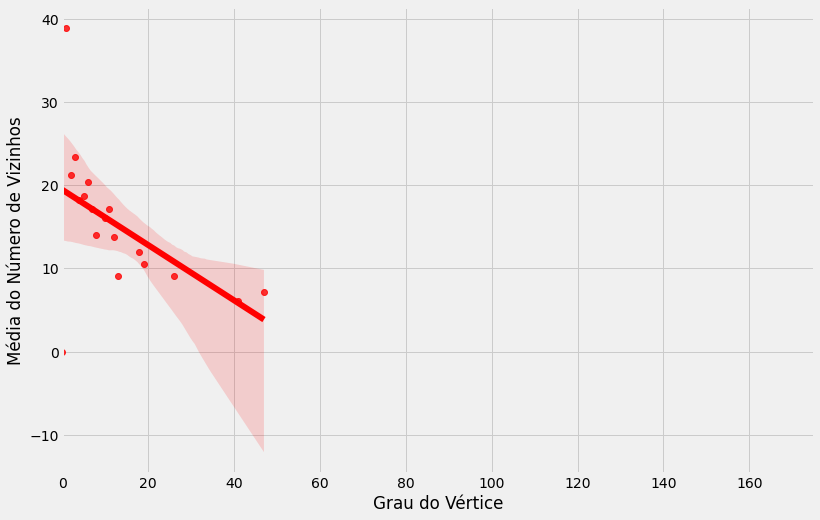

In [28]:
DS_air_traffic_br_co = nx.subgraph(DS_air_traffic_br, lista_cetro_oeste)

degree, avg_neigh_degree = zip(*nx.average_degree_connectivity(DS_air_traffic_br_co).items())

degree = list(degree)
avg_neigh_degree = list(avg_neigh_degree)

plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(1,1,figsize=(12,8))

sns.regplot(degree,avg_neigh_degree,ax=ax,color="red")

ax.set_xlabel("Grau do Vértice")
ax.set_ylabel("Média do Número de Vizinhos")
ax.set_xlim(0,175)

plt.show()

###Nordeste

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


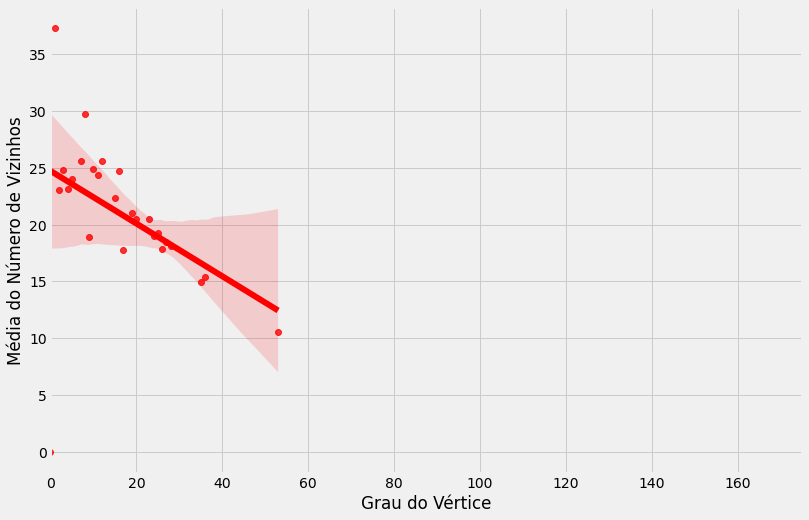

In [29]:
DS_air_traffic_br_nord = nx.subgraph(DS_air_traffic_br, lista_nordeste)

degree, avg_neigh_degree = zip(*nx.average_degree_connectivity(DS_air_traffic_br_nord).items())

degree = list(degree)
avg_neigh_degree = list(avg_neigh_degree)

plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(1,1,figsize=(12,8))

sns.regplot(degree,avg_neigh_degree,ax=ax,color="red")

ax.set_xlabel("Grau do Vértice")
ax.set_ylabel("Média do Número de Vizinhos")
ax.set_xlim(0,175)

plt.show()

###Norte

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


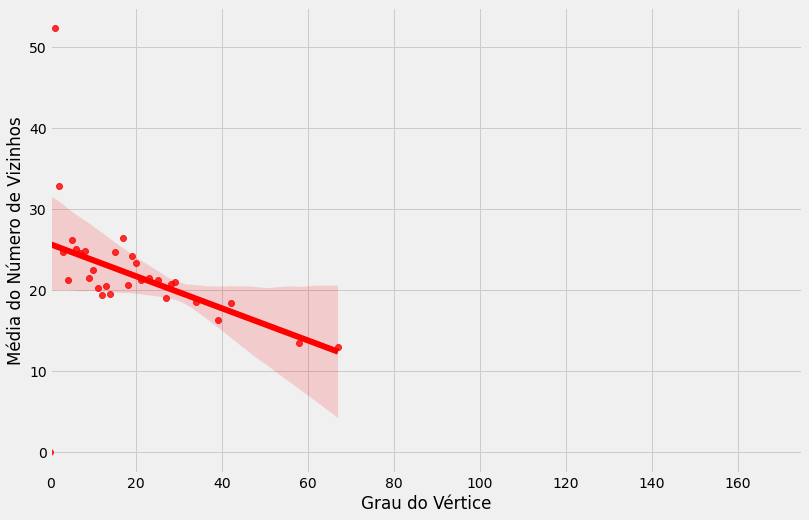

In [30]:
DS_air_traffic_br_nort = nx.subgraph(DS_air_traffic_br, lista_norte)

degree, avg_neigh_degree = zip(*nx.average_degree_connectivity(DS_air_traffic_br_nort).items())

degree = list(degree)
avg_neigh_degree = list(avg_neigh_degree)

plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(1,1,figsize=(12,8))

sns.regplot(degree,avg_neigh_degree,ax=ax,color="red")

ax.set_xlabel("Grau do Vértice")
ax.set_ylabel("Média do Número de Vizinhos")
ax.set_xlim(0,175)

plt.show()

###Sul

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


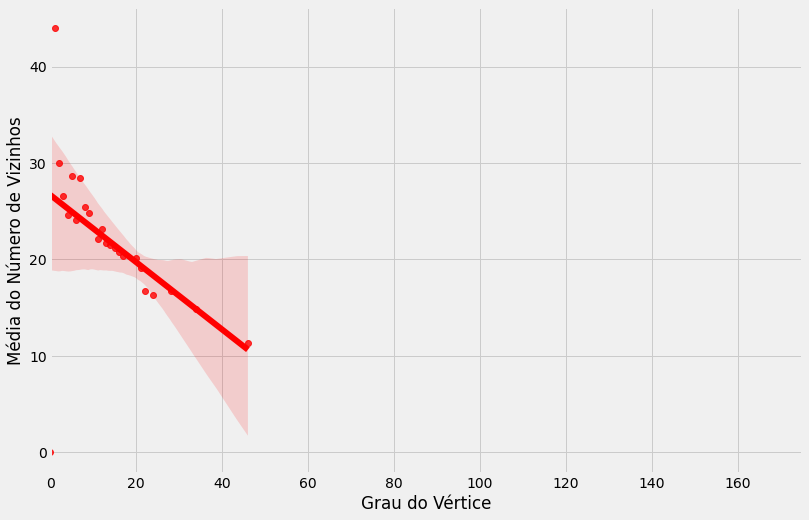

In [31]:
DS_air_traffic_br_sul = nx.subgraph(DS_air_traffic_br, lista_sul)

degree, avg_neigh_degree = zip(*nx.average_degree_connectivity(DS_air_traffic_br_sul).items())

degree = list(degree)
avg_neigh_degree = list(avg_neigh_degree)

plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(1,1,figsize=(12,8))

sns.regplot(degree,avg_neigh_degree,ax=ax,color="red")

ax.set_xlabel("Grau do Vértice")
ax.set_ylabel("Média do Número de Vizinhos")
ax.set_xlim(0,175)

plt.show()

###Sudeste

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


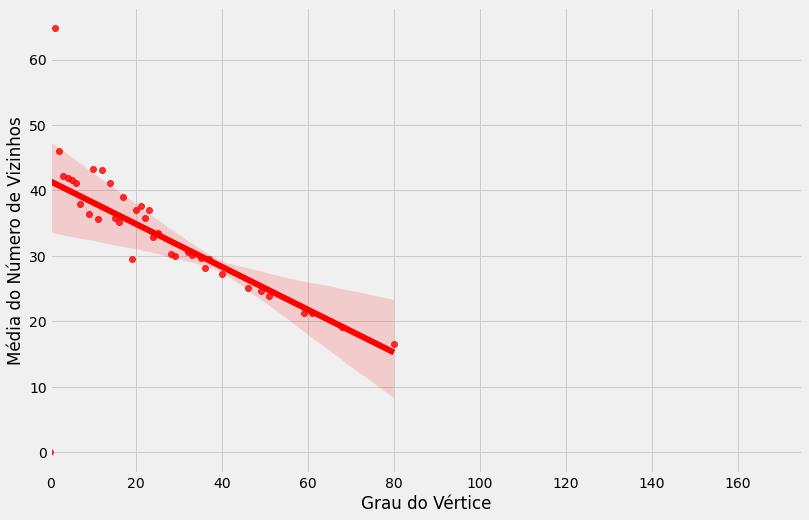

In [32]:
DS_air_traffic_br_sud = nx.subgraph(DS_air_traffic_br, lista_sudeste)

degree, avg_neigh_degree = zip(*nx.average_degree_connectivity(DS_air_traffic_br_sud).items())

degree = list(degree)
avg_neigh_degree = list(avg_neigh_degree)

plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(1,1,figsize=(12,8))

sns.regplot(degree,avg_neigh_degree,ax=ax,color="red")

ax.set_xlabel("Grau do Vértice")
ax.set_ylabel("Média do Número de Vizinhos")
ax.set_xlim(0,175)

plt.show()

Fazer um relato dos principais achados.

##Quantos componentes conectados existem na malha aérea brasileira?

In [33]:
nx.number_connected_components(DS_air_traffic_br)

5

In [54]:
components = nx.connected_components(DS_air_traffic_br)
for c in components:
  print(f'Quantidade: {len(c)}, Elementos: {c}')

Quantidade: 491, Elementos: {'SSFB', 'SBBR', 'SSTE', 'SSZR', 'SWBI', 'SBGS', 'SDBB', 'SNAH', 'SIXE', 'SDMC', 'SNTF', 'SBJD', 'SBLO', 'SBCY', 'SWKN', 'SBCI', 'SBML', 'SBCJ', 'SSCK', 'SDAN', 'SDZG', 'SBCZ', 'SNSH', 'SSCL', 'SNGQ', 'SBIC', 'SWCQ', 'SBSN', 'SSUW', 'SWPJ', 'SDOW', 'SNJK', 'SNBW', 'SJUR', 'SWHP', 'SNLA', 'SWNB', 'SBTB', 'SBMQ', 'SNZR', 'SBGV', 'SBSO', 'SNBA', 'SBVC', 'SBPI', 'SBKP', 'SSIJ', 'SIMK', 'SNOX', 'SDOV', 'SNBV', 'SNBS', 'SBBI', 'SBSG', 'SBYA', 'SSAC', 'SBPL', 'SBPV', 'SSOU', 'SBKG', 'SNEB', 'SNJN', 'SWFE', 'SWBU', 'SBZM', 'SWJV', 'SWEE', 'SNKK', 'SNGX', 'SWNK', 'SIBU', 'SBSP', 'SBPJ', 'SWJU', 'SBNT', 'SBMT', 'SDIM', 'SBPB', 'SBMS', 'SBSL', 'SBRG', 'SSKM', 'SDVE', 'SBJP', 'SBTK', 'SBNM', 'SBST', 'SSKW', 'SBGU', 'SBMN', 'SWNS', 'SSGY', 'SIZX', 'SWGI', 'SWJP', 'SWJN', 'SBSJ', 'SBAA', 'SNQY', 'SBAX', 'SJNP', 'SBRF', 'SDLK', 'SWMK', 'SNCI', 'SBVH', 'SSNM', 'SNUC', 'SBFN', 'SDAM', 'SWXM', 'SBJR', 'SBCH', 'SSND', 'SSHZ', 'SNYA', 'SNUB', 'SWVR', 'SNJO', 'SBCB', 'SBMH', 'SN

Caracterize cada componente: quantidade, porcentagem por região

In [73]:
lista = list(nx.connected_components(DS_air_traffic_br))[0]

DS_biggest_component_br = nx.subgraph(DS_air_traffic_br, lista)
num_nodes = len(DS_biggest_component_br.nodes())

In [77]:
lista_cetro_oeste = []
lista_nordeste = []
lista_norte = []
lista_sul = []
lista_sudeste = []

for node in DS_biggest_component_br.nodes(data=True):
  if node[1]["region"] == "CENTRO-OESTE":
    lista_cetro_oeste.append(node[0])
  if node[1]["region"] == "NORDESTE":
    lista_nordeste.append(node[0])
  if node[1]["region"] == "NORTE":
    lista_norte.append(node[0])
  if node[1]["region"] == "SUL":
    lista_sul.append(node[0])
  if node[1]["region"] == "SUDESTE":
    lista_sudeste.append(node[0])

In [100]:
print("Região         Quant.       Porcentagem")
print("Centro-Oeste - %i    ------ %.2f%%" % (len(lista_cetro_oeste), (len(lista_cetro_oeste)/num_nodes*100)))
print("nordeste ----- %i    ------ %.2f%%" % (len(lista_nordeste), (len(lista_nordeste)/num_nodes*100)))
print("Norte -------- %i   ------ %.2f%%" % (len(lista_norte), (len(lista_norte)/num_nodes*100)))
print("Sul ---------- %i    ------ %.2f%%" % (len(lista_sul), (len(lista_sul)/num_nodes*100)))
print("Sudeste ------ %i   ------ %.2f%%" % (len(lista_sudeste), (len(lista_sudeste)/num_nodes*100)))

Região         Quant.       Porcentagem
Centro-Oeste - 88    ------ 17.92%
nordeste ----- 92    ------ 18.74%
Norte -------- 126   ------ 25.66%
Sul ---------- 70    ------ 14.26%
Sudeste ------ 115   ------ 23.42%
